In [1]:
#このコードはGoogle Colabの環境でTensorFlow2のライブラリーを使用するためのコードです。
try:
  %tensorflow_version 2.x
except Exception:
  pass

TensorFlow 2.x selected.


In [0]:
#単層ニューラルネットを用いた画像分類器を作成し、正解率を検証します。
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.datasets import mnist

In [3]:
#MNISTの画像データを訓練データと検証データを分けて格納します。
(x_train, y_train),(x_test, y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [0]:
#訓練データxに格納したベクトルデータは0～255の濃淡値で手書き画像を表しています。
#この数値を255.0で割って、0～1.Oの値に正規化します。
x_train=x_train/255.0
x_test=x_test/255.0

In [0]:
#正解ラベルy_y_trainとy_testには、0～9の整数が格納されています。
#これを、一つだけ1にして残りを0にする配列で表現します。これをone-hot形式といいます。
#例 0の場合　0;[1,0,0,0,0,0,0,0,0,0]
#例 1の場合  1:[0,1,0,0,0,0,0,0,0,0] 
#none-hotの変換はkerasのユーテリティを使うか、numpyのnp.eyeを使います。
y_train=np.eye(10)[y_train]
y_test=np.eye(10)[y_test]

In [0]:
#モデルを定義します。
#MNISTの画像は28×28のサイズなので、Flattenで1次元の配列に変換して入力層とします。
#次に10個のニューロンを持つ出力層をDenseで定義します。
#活性化関数にはsoftmaxを指定します。
model=Sequential([
    Flatten(input_shape=(28,28)),
    Dense(10,activation='softmax')
])

In [0]:
#損失関数として交差エントロピーを指定し、最適化関数に確立的最急降下法を指定します。
#評価指標に正解率を指定します。
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(0.5),
              metrics=['accuracy'])

In [8]:
#訓練を開始します。
history=model.fit(x_train, y_train, epochs=100, batch_size=75,
                   verbose=2)

Train on 60000 samples
Epoch 1/100
60000/60000 - 4s - loss: 0.3838 - accuracy: 0.8894
Epoch 2/100
60000/60000 - 2s - loss: 0.3060 - accuracy: 0.9134
Epoch 3/100
60000/60000 - 2s - loss: 0.2919 - accuracy: 0.9169
Epoch 4/100
60000/60000 - 2s - loss: 0.2849 - accuracy: 0.9203
Epoch 5/100
60000/60000 - 2s - loss: 0.2784 - accuracy: 0.9227
Epoch 6/100
60000/60000 - 2s - loss: 0.2762 - accuracy: 0.9232
Epoch 7/100
60000/60000 - 2s - loss: 0.2731 - accuracy: 0.9232
Epoch 8/100
60000/60000 - 2s - loss: 0.2711 - accuracy: 0.9247
Epoch 9/100
60000/60000 - 2s - loss: 0.2690 - accuracy: 0.9243
Epoch 10/100
60000/60000 - 2s - loss: 0.2673 - accuracy: 0.9248
Epoch 11/100
60000/60000 - 2s - loss: 0.2648 - accuracy: 0.9265
Epoch 12/100
60000/60000 - 2s - loss: 0.2636 - accuracy: 0.9259
Epoch 13/100
60000/60000 - 2s - loss: 0.2633 - accuracy: 0.9268
Epoch 14/100
60000/60000 - 2s - loss: 0.2618 - accuracy: 0.9273
Epoch 15/100
60000/60000 - 2s - loss: 0.2610 - accuracy: 0.9268
Epoch 16/100
60000/60000 -

In [9]:
#モデルの正解率が表示されます。
score=model.evaluate(x_test, y_test, verbose=0)
print('Accuracy=',score[1])

Accuracy= 0.9215


In [0]:
%matplotlib inline
import matplotlib.pyplot as plt

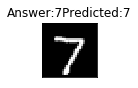

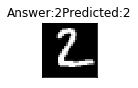

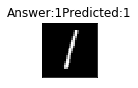

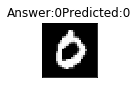

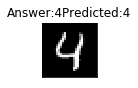

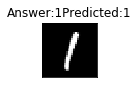

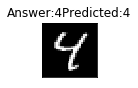

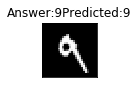

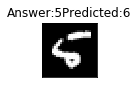

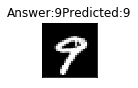

In [11]:
for i in range(10):
    plt.figure(figsize=(1,1))
    score=model.predict(x_test[i].reshape(1,28,28))
    predicted=np.argmax(score)
    answer=np.argmax(y_test[i])
    plt.title('Answer:'+str(answer)+'Predicted:'+str(predicted))

    plt.imshow(x_test[i].reshape(28,28), cmap='gray')
    plt.xticks(())
    plt.yticks(())
    plt.show()